# 2.3 高斯分布

高斯分布是我们日常生活中最常用到的分布，人们生活中很多连续随机变量的统计分布，比如身高，体重等，都可以由高斯分布建模。当我们要研究的问题只有一个变量$x$时，我们可以使用单元高斯分布(univariate gaussian)来建模，其概率密度函数(pdf)可以表示如下
$$ \mathcal{N}(x|\mu,\sigma^2)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\{-\frac{1}{2\sigma^2}(x-\mu)^2\}$$
其中$\mu,\sigma^2$分别称为该高斯分布的均值和方差。如果我们要研究的统计量和多个随机因素有关，最佳的建模方法是使用多元高斯分布(multivariate gaussian)，其pdf如下
$$ \mathcal{N}(\mathbf{x}|\boldsymbol{\mu},\Sigma)=\frac{1}{(2\pi)^{D/2}}\frac{1}{|\Sigma|^{1/2}}\exp\{-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^T\Sigma^{-1}(\mathbf{x}-\boldsymbol{\mu})\}$$
这里$\mathbf{x}$和$\boldsymbol{\mu}$均是$D$维变量，$\Sigma$是一个$D\times D$的协方差矩阵，$|\Sigma|$是它的行列式。 



我们可以从许多不同的角度来理解高斯分布。  
1.高斯分布是所有定义在$(-\infty,+\infty)$上且具有有限的均值$\mu$和有限的方差$\sigma^2$的分布中，使得信息熵最大化的分布  
证明：  
我们的目标是找到一个分布$p(x)$以最大化如下的式子：
$$H(X)=-\int_{-\infty}^{+\infty} p(x) \ln p(x)dx$$
由于要优化的对象是一个函数，所以要使用变分法。同时我们注意到$p(x)$满足如下约束  
$$p(x)\geq 0\\\int_{-\infty}^{+\infty}p(x)dx=1\\ \int_{-\infty}^{+\infty} xp(x)dx=\mu\\\int_{-\infty}^{+\infty}x^2p(x)dx=\sigma^2$$  
应用拉格朗日乘数法，我们引入一个拉格朗日函数
$$L(p,\lambda)=\underbrace{-\int_{-\infty}^{+\infty} p(x) \ln p(x)dx}_{L_1(p)}+\underbrace{\lambda_0(\int_{-\infty}^{+\infty}p(x)dx-1)}_{L_2(p,\lambda_0)}+\underbrace{\lambda_1 (\int_{-\infty}^{+\infty} xp(x)dx-\mu)}_{L_3(p,\lambda_1)}+\underbrace{\lambda_2(\int_{-\infty}^{+\infty}x^2p(x)dx-\sigma^2)}_{L_4(p,\lambda_2)}$$
其中$\lambda=\{\lambda_0,\lambda_1,\lambda_2\}$。  
对泛函$L(p,\lambda)$关于$p(x)$的导数可以分解为$L_1(p),L_2(p,\lambda_0),L_3(p,\lambda_1),L_4(p,\lambda_2)$关于$p(x)$的导数之和

1)$\frac{\delta L_1(p)}{ \delta p(x_0)}$  
$$\begin{aligned}\frac{\delta L_1(p(x))}{ \delta p(x_0)}&=\lim_{\epsilon\to 0}\frac{1}{\epsilon}[L_1(p(x)+\epsilon\delta(x-x_0))-L_1(p(x))]\\&=\lim_{\epsilon\to 0}\frac{1}{\epsilon}\bigg[-\int_{-\infty}^{+\infty} \big\{\big[p(x)+\epsilon\delta(x-x_0)\big] \ln \big(p(x)+\epsilon\delta(x-x_0)\big)-p(x) \ln p(x)\big\}dx\\&=\lim_{\epsilon\to 0}\frac{1}{\epsilon}\bigg[-\int_{-\infty}^{+\infty}\big\{p(x)\ln(1+\frac{1}{p(x)}\epsilon\delta(x-x_0))+\epsilon\delta(x-x_0)\ln\big(p(x)+\epsilon\delta(x-x_0)\big)\big\}dx\end{aligned}$$
其中$\delta(x-x_0)$是狄拉克$\delta$函数，它具有如下性质：
$$\delta(x-x_0)=\infty,(x=x_0)\\\delta(x-x_0)=0,(x\neq x_0)\\\int_{-\infty}^{+\infty}\delta(x-x_0)dx=1\\\int_{-\infty}^{+\infty}f(x)\delta(x-x_0)dx=f(x_0)$$
回顾$\ln (1+x)$的泰勒展开
$$ln(1+x)=x-\frac{x^2}{2}+\frac{x^3}{3}-...=x+o(x)$$
其中$o(x)$是关于$x$的高阶无穷小  
于是
$$\ln(1+\frac{1}{p(x)}\epsilon\delta(x-x_0))= \frac{1}{p(x)}\epsilon\delta(x-x_0)+o(\epsilon)$$
其中$o(\epsilon)$表示关于$\epsilon$的高阶无穷小，即
$$\lim_{\epsilon\to 0}\frac{o(\epsilon)}{\epsilon}=0$$
于是原式可以进一步化简为
\begin{aligned}\frac{\delta L_1(p(x))}{ \delta p(x_0)}&=\lim_{\epsilon\to 0}\frac{1}{\epsilon}\bigg[-\int_{-\infty}^{+\infty}\big\{\epsilon\delta(x-x_0)+o(\epsilon)+\epsilon\delta(x-x_0)\ln\big(p(x)+\epsilon\delta(x-x_0)\big)\big\}dx\bigg]\\&=\lim_{\epsilon\to 0}\frac{1}{\epsilon}\bigg[-\int_{-\infty}^{+\infty}\big\{\epsilon\delta(x-x_0)+o(\epsilon)+\epsilon\delta(x-x_0)\ln\big(p(x)[1+\frac{1}{p(x)}\epsilon\delta(x-x_0)]\big)\big\}dx\bigg]\\&=\lim_{\epsilon\to 0}\frac{1}{\epsilon}\bigg[-\int_{-\infty}^{+\infty}\big\{\epsilon\delta(x-x_0)+\epsilon\delta(x-x_0)\ln p(x) + o(\epsilon)\big\}dx\bigg]\\&=-\int_{-\infty}^{+\infty}\lim_{\epsilon\to 0}\frac{1}{\epsilon}\big\{\epsilon\delta(x-x_0)+\epsilon\delta(x-x_0)\ln p(x) + o(\epsilon)\big\}dx\\&=-\int_{-\infty}^{+\infty}\big\{\delta(x-x_0)+\delta(x-x_0)\ln p(x)\big\}dx\\&=-1-\ln p(x_0)\end{aligned}

2)$\frac{\delta L_2(p,\lambda_0)}{ \delta p(x_0)}$  
$$\begin{aligned}\frac{\delta L_2(p(x),\lambda_0)}{ \delta p(x_0)}&=\lim_{\epsilon\to 0}\frac{1}{\epsilon}[L_2(p(x)+\epsilon\delta(x-x_0),\lambda_0)-L_2(p(x),\lambda_0) ]\\&=\lambda_0\lim_{\epsilon\to 0}\frac{1}{\epsilon}\bigg[\int_{-\infty}^{+\infty} \big\{p(x)+\epsilon\delta(x-x_0)-p(x)\big\}dx\bigg]\\&=\lambda_0\int_{-\infty}^{+\infty} \delta(x-x_0)dx \\&=\lambda_0\end{aligned}$$

3)$\frac{\delta L_3(p,\lambda_1)}{ \delta p(x_0)}$  
$$\begin{aligned}\frac{\delta L_3(p(x),\lambda_1)}{ \delta p(x_0)}&=\lim_{\epsilon\to 0}\frac{1}{\epsilon}[L_3(p(x)+\epsilon\delta(x-x_0),\lambda_1)-L_3(p(x),\lambda_1) ]\\&=\lambda_1\lim_{\epsilon\to 0}\frac{1}{\epsilon}\bigg[\int_{-\infty}^{+\infty} x\big\{p(x)+\epsilon\delta(x-x_0)-p(x)\big\}dx\bigg]\\&=\lambda_1\int_{-\infty}^{+\infty} x\delta(x-x_0) dx=\lambda_1 x_0\end{aligned}$$

4)$\frac{\delta L_4(p,\lambda_2)}{ \delta p(x_0)}$  
$$\begin{aligned}\frac{\delta L_4(p(x),\lambda_2)}{ \delta p(x_0)}&=\lim_{\epsilon\to 0}\frac{1}{\epsilon}[L_4(p(x)+\epsilon\delta(x-x_0),\lambda_2)-L_4(p(x),\lambda_2) ]\\&=\lambda_2\lim_{\epsilon\to 0}\frac{1}{\epsilon}\bigg[\int_{-\infty}^{+\infty} x^2\big\{p(x)+\epsilon\delta(x-x_0)-p(x)\big\}dx\bigg]\\&=\lambda_2\int_{-\infty}^{+\infty} x^2\delta(x-x_0) dx=\lambda_2 x_0^2\end{aligned}$$

于是由
$$\begin{aligned}\frac{\delta L(p,\lambda)}{\delta p(x_0)}&=\frac{\delta L_1(p)}{ \delta p(x_0)}+\frac{\delta L_2(p,\lambda_0)}{ \delta p(x_0)}+\frac{\delta L_3(p,\lambda_1)}{ \delta p(x_0)}+\frac{\delta L_4(p,\lambda_2)}{ \delta p(x_0)}\\&=-\ln p(x_0)-1+\lambda_0+\lambda_1 x_0+\lambda_2 x_0^2=0\end{aligned}$$
得
$$p(x)=\exp((\lambda_0-1)+\lambda_1 x+\lambda_2 x^2)$$
根据约束条件
$$\int_{-\infty}^{+\infty}p(x)dx=1\\ \int_{-\infty}^{+\infty} xp(x)dx=\mu\\\int_{-\infty}^{+\infty}x^2p(x)dx=\sigma^2$$
可以求得
$$p(x)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\{-\frac{1}{2\sigma^2}(x-\mu)^2\}$$

## 中心极限定理
在一定条件下，一组随机变量的和也是一个随机变量，且随着这组随机变量数量的增加，和的分布趋近于高斯分布。

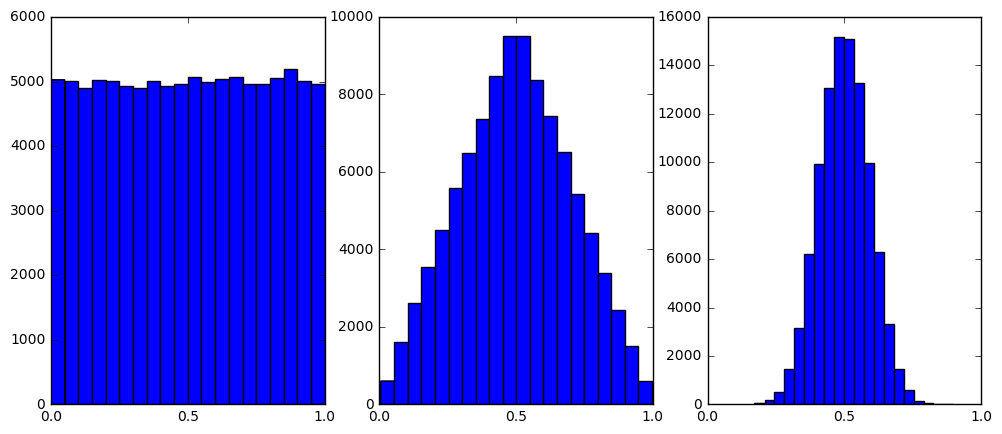

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
n_exp = 100000
n_pts = [1, 2, 10]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,5))
axes = np.ravel(axes)
for ax, n in zip(axes, n_pts):
    rndVals = np.random.uniform(size=(n_exp, n))
    rndVals = rndVals.mean(axis=1)
    ax.hist(rndVals, bins=20)
    ax.set_xticks([0,0.5,1])
plt.show()